In [24]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import numpy as np
import os

Select 20 categoies

In [5]:
import os
import shutil

# Source and destination paths
source_path = '/Users/ruoqiyan/Desktop/690ML/ml_project/data/images/'
# Get a list of all subdirectories (categories)
categories = sorted([d for d in os.listdir(source_path) if os.path.isdir(os.path.join(source_path, d))])

print(f"Total Categories: {len(categories)}")
print("Categories:")
print(categories)

Total Categories: 101
Categories:
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_

In [58]:
data_path = '/Users/ruoqiyan/Desktop/690ML/ml_project/food_20_data/images/'

# select 20 categories
selected_categories = categories[0:20]

# Create destination directory if not exists
os.makedirs(data_path, exist_ok=True)

selected_categories

['cheese_plate',
 'chicken_curry',
 'cheesecake',
 'breakfast_burrito',
 'beef_tartare',
 'beet_salad',
 'ceviche',
 'bruschetta',
 'apple_pie',
 'cannoli',
 'chicken_quesadilla',
 'beef_carpaccio',
 'beignets',
 'bibimbap',
 'baby_back_ribs',
 'bread_pudding',
 'caprese_salad',
 'baklava',
 'carrot_cake',
 'caesar_salad']

In [7]:
# Copy selected categories to the new dataset folder
for category in selected_categories:    
    src = os.path.join(source_path, category)
    dst = os.path.join(data_path, category)
    if os.path.exists(src):
        shutil.copytree(src, dst)
print("Dataset reduced to 20 categories!")

FileExistsError: [Errno 17] File exists: '/Users/ruoqiyan/Desktop/690ML/ml_project/food_20_data/images/apple_pie'

### Visualization

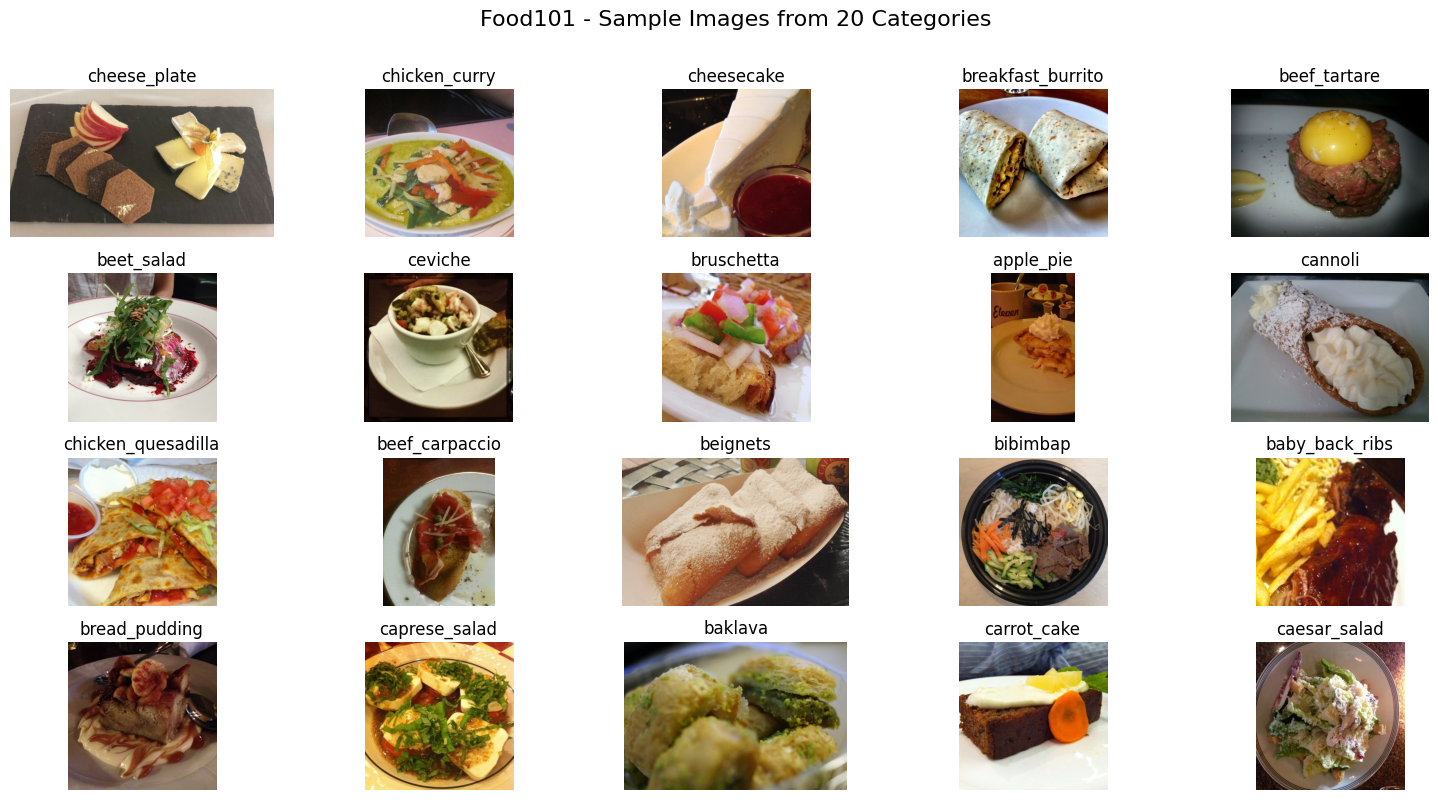

In [56]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# Fetch all categories
categories = os.listdir(data_path)

# Function to visualize one image per category
def visualize_categories(data_path, categories):
    num_categories = len(categories)
    cols = 5  # Number of columns in the grid
    rows = (num_categories // cols) + 1  # Calculate number of rows based on categories

    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    fig.suptitle("Food101 - Sample Images from 20 Categories", fontsize=16)

    for i, category in enumerate(categories):
        # Path to category folder
        category_path = os.path.join(data_path, category)

        # Randomly pick an image from the category
        image_name = random.choice(os.listdir(category_path))
        image_path = os.path.join(category_path, image_name)

        # Load and display the image
        img = Image.open(image_path)
        ax = axes[i // cols, i % cols]
        ax.imshow(img)
        ax.set_title(category)
        ax.axis('off')

    # Hide unused subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j // cols, j % cols])

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Call the function
visualize_categories(data_path, categories)

In [61]:
import os
from PIL import Image
import pandas as pd

# Initialize a dictionary to store properties
category_properties = {
    "Category": [],
    "Number of Images": [],
    "Average Resolution": [],
    "Min Resolution": [],
    "Max Resolution": [],
    "Average File Size (KB)": [],
    "Min File Size (KB)": [],
    "Max File Size (KB)": []
}

# Iterate over each category
for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    if not os.path.isdir(category_path):
        continue
    
    image_resolutions = []
    file_sizes = []

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                # Get image resolution
                image_resolutions.append(img.size)  # (width, height)
                # Get file size
                file_sizes.append(os.path.getsize(img_path) / 1024)  # Size in KB
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

    if image_resolutions:
        # Extract resolutions
        widths, heights = zip(*image_resolutions)
        avg_resolution = (sum(widths) // len(widths), sum(heights) // len(heights))
        min_resolution = (min(widths), min(heights))
        max_resolution = (max(widths), max(heights))
    else:
        avg_resolution = min_resolution = max_resolution = (0, 0)
    
    # Store properties
    category_properties["Category"].append(category)
    category_properties["Number of Images"].append(len(image_resolutions))
    category_properties["Average Resolution"].append(avg_resolution)
    category_properties["Min Resolution"].append(min_resolution)
    category_properties["Max Resolution"].append(max_resolution)
    category_properties["Average File Size (KB)"].append(sum(file_sizes) / len(file_sizes) if file_sizes else 0)
    category_properties["Min File Size (KB)"].append(min(file_sizes) if file_sizes else 0)
    category_properties["Max File Size (KB)"].append(max(file_sizes) if file_sizes else 0)

# Convert to DataFrame
properties_df = pd.DataFrame(category_properties)

# Display properties
properties_df.to_excel('/Users/ruoqiyan/Desktop/690ML/ml_project/dataset_description.xlsx')


Model

In [11]:
# Dataset directory
dataset_path = data_path

# Image dimensions (299x299 for InceptionV3 or 224x224 for ResNet50)
img_size = (299, 299)
batch_size = 32

# Data Augmentation and Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% for validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)



# Load the InceptionV3 model with ImageNet weights, excluding the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(*img_size, 3))

# Freeze all layers in the base model to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(20, activation='softmax')(x)  # 20 categories for the output layer

# Final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with categorical cross-entropy loss
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set up early stopping and model checkpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_food20_model.h5', save_best_only=True)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust based on validation performance
    validation_data=validation_generator,
    callbacks=callbacks
)

Found 16000 images belonging to 20 classes.
Found 4000 images belonging to 20 classes.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 149, 149, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 149, 149, 32)         0         ['batch_normalization_94

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


500/500 [==============================] - 529s 1s/step - loss: 2.0974 - accuracy: 0.3769 - val_loss: 1.4710 - val_accuracy: 0.5922
Epoch 2/10
500/500 [==============================] - 529s 1s/step - loss: 1.5129 - accuracy: 0.5439 - val_loss: 1.2919 - val_accuracy: 0.6227
Epoch 3/10
500/500 [==============================] - 525s 1s/step - loss: 1.3674 - accuracy: 0.5819 - val_loss: 1.2039 - val_accuracy: 0.6453
Epoch 4/10
500/500 [==============================] - 527s 1s/step - loss: 1.2802 - accuracy: 0.6106 - val_loss: 1.1649 - val_accuracy: 0.6495
Epoch 5/10
500/500 [==============================] - 542s 1s/step - loss: 1.2223 - accuracy: 0.6288 - val_loss: 1.1577 - val_accuracy: 0.6515
Epoch 6/10
500/500 [==============================] - 545s 1s/step - loss: 1.1841 - accuracy: 0.6407 - val_loss: 1.1092 - val_accuracy: 0.6685
Epoch 7/10
500/500 [==============================] - 543s 1s/step - loss: 1.1552 - accuracy: 0.6507 - val_loss: 1.0775 - val_accuracy: 0.6773
Epoch 8/10

Evaluation

In [12]:
# Unfreeze the last 30 layers of the base model
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Re-compile with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=validation_generator,
    callbacks=callbacks
)



Epoch 1/10
500/500 [==============================] - 466s 927ms/step - loss: 1.1240 - accuracy: 0.6624 - val_loss: 1.0046 - val_accuracy: 0.7003
Epoch 2/10
500/500 [==============================] - 480s 961ms/step - loss: 1.0142 - accuracy: 0.6917 - val_loss: 0.9640 - val_accuracy: 0.7040
Epoch 3/10
500/500 [==============================] - 469s 937ms/step - loss: 0.9707 - accuracy: 0.7027 - val_loss: 0.9359 - val_accuracy: 0.7200
Epoch 4/10
500/500 [==============================] - 487s 974ms/step - loss: 0.9309 - accuracy: 0.7115 - val_loss: 0.9159 - val_accuracy: 0.7240
Epoch 5/10
500/500 [==============================] - 488s 976ms/step - loss: 0.9018 - accuracy: 0.7244 - val_loss: 0.9109 - val_accuracy: 0.7222
Epoch 6/10
500/500 [==============================] - 492s 983ms/step - loss: 0.8704 - accuracy: 0.7359 - val_loss: 0.8821 - val_accuracy: 0.7337
Epoch 7/10
500/500 [==============================] - 486s 972ms/step - loss: 0.8427 - accuracy: 0.7434 - val_loss: 0.8591 -

In [13]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


125/125 [==============================] - 87s 695ms/step - loss: 0.8412 - accuracy: 0.7470
Validation Accuracy: 74.70%


In [14]:
# save model
# Save the model
model.save('food_recognition_model2.h5')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('food_recognition_model2.h5')


Prediction

In [37]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_food(img_path, model, target_size=(299, 299)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get class labels
    class_labels = list(train_generator.class_indices.keys())
    
    return class_labels[predicted_class]

# Test the function with a new image
food_type = predict_food('/Users/ruoqiyan/Desktop/690ML/ml_project/data/random_pics/applepie_r.jpeg', loaded_model)
print(f'Predicted Food: {food_type}')

1/1 [==============================] - 0s 62ms/step
Predicted Food: apple_pie


# Portion Size Estimation 
Placeholder estimation for portion size

In [32]:
# selected_categories

# Base portion size (in grams) and variation factor
base_portion = 200
variation_factor = 0.5  # ±50%

# Randomly generate portion sizes for all categories
def generate_portion_ranges(categories, base, variation):
    portion_ranges = {}
    for category in categories:
        min_portion = np.random.uniform(base * (1 - variation), base * (1 - variation / 2))
        max_portion = np.random.uniform(base * (1 + variation / 2), base * (1 + variation))
        portion_ranges[category] = (round(min_portion), round(max_portion))
    return portion_ranges

# Generate portion size ranges for selected categories
portion_ranges = generate_portion_ranges(selected_categories, base_portion, variation_factor)

# Display portion ranges as a DataFrame for clarity
portion_ranges_df = pd.DataFrame.from_dict(portion_ranges, orient="index", columns=["Min Portion (grams)", "Max Portion (grams)"])
portion_ranges_df.index.name = "Food Category"

# Save or inspect the portion ranges
portion_ranges_df

,Min Portion (grams),Max Portion (grams)
Food Category,,
apple_pie,134,292
baby_back_ribs,139,260
baklava,103,277
beef_carpaccio,142,298
beef_tartare,149,298
beet_salad,146,260
beignets,104,288
bibimbap,125,278
bread_pudding,145,258


### need the depth to calculate the volume, and convert the volume to grams

In [48]:
depth = [3.5, 3, 1.75, 0.4, 1.75, 2.5, 4, 5, 4, 7, 1.5, 2.5, 3, 2, 5.5, 1.5, 2, 4, 3, 3]
# Dense: 1.2 g/cm³, Medium: 1.0 g/cm³, Light: 0.5-0.8 g/cm³
densities_g_cm3 = [
    1.0, 1.2, 1.2, 1.2, 1.2, 1.0, 0.8, 1.0, 1.0, 1.0,
    0.8, 1.0, 1.2, 1.0, 1.2, 1.0, 1.2, 1.2, 1.0, 1.0
]
portion_ranges_df['depth'] = depth
portion_ranges_df['densities/cm3'] = densities_g_cm3

### Food object isolation

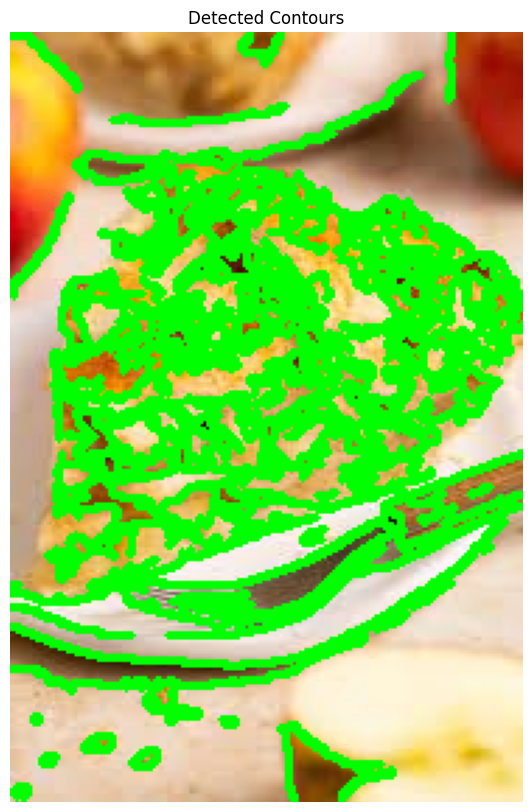

Area of the food in pixels: 385.5
Approximate food area in cm²: 0.15


In [1]:
import cv2
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = "/Users/ruoqiyan/Desktop/690ML/ml_project/data/random_pics/applepie_r.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale and apply edge detection
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw and display contours
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(contour_image)
plt.title("Detected Contours")
plt.axis("off")
plt.show()

# Calculate the area of the largest contour
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    pixel_area = cv2.contourArea(largest_contour)
    print(f"Area of the food in pixels: {pixel_area}")

    # Conversion factor: Pixels to real-world units (e.g., cm²)
    # Example: Assume 1 cm = 50 pixels (this depends on a reference object in the image)
    pixels_per_cm = 50  # Example value
    real_area_cm2 = pixel_area / (pixels_per_cm ** 2)
    print(f"Approximate food area in cm²: {real_area_cm2:.2f}")
else:
    print("No contours found.")


In [51]:
def estimate_food_size(food_type, pixel_area):
    # Define average real-world sizes (e.g., in cm²) for some food types
    food_sizes = portion_ranges_df['Max Portion (grams)']
    average_size = food_sizes[food_type] 
    # Scale the pixel area to approximate real-world size
    scaling_factor = average_size / 1000  # Example factor
    return pixel_area * scaling_factor

pixel_area = 1500    # Area calculated from segmentation
real_world_size = estimate_food_size(food_type, pixel_area) * portion_ranges_df['depth'][food_type]
print(f"Estimated size of the food: {real_world_size:.2f} cm3")


Estimated size of the food: 1533.00 cm3


### convert size 

In [53]:
size_in_grams = portion_ranges_df['densities/cm3'][food_type] * real_world_size
print(f"Estimated volume of the food: {size_in_grams:.2f} grams")

Estimated volume of the food: 1533.00 grams


## Calories Calculation

In [33]:
# minimum and maximum calorie values per 100g
min_calories = [
    237, 233, 429, 130, 150, 74, 280, 170, 220, 180,
    160, 120, 250, 150, 310, 120, 350, 250, 150, 260
]

max_calories = [
    329, 267, 550, 150, 200, 90, 320, 200, 280, 210,
    200, 160, 300, 200, 360, 150, 400, 310, 200, 330
]

df_calories = pd.DataFrame(index = portion_ranges_df.index)
df_calories['min_calories'] = min_calories
df_calories['max_calories'] = max_calories
df_calories

,min_calories,max_calories
Food Category,,
apple_pie,237,329
baby_back_ribs,233,267
baklava,429,550
beef_carpaccio,130,150
beef_tartare,150,200
beet_salad,74,90
beignets,280,320
bibimbap,170,200
bread_pudding,220,280


In [54]:
calories_range = [size_in_grams * df_calories.loc[food_type]['min_calories'], size_in_grams * df_calories.loc[food_type]['max_calories']]

In [55]:
print(f'The estimation of calories for the{food_type} is {calories_range}')

The estimation of calories for theapple_pie is [363321.0, 504357.0]
